# Analysis of non-normal data 

&nbsp;&nbsp;&nbsp;&nbsp;example by <harald.weedon-fekjar@medisin.uio.no>, 2025


Data:<br/>
 USA NHANES 2009-2012 data  on alcohol consumption for people >= 18 years old, </br>
 measured as  number of days over the past year that participant drank alcoholic.

In [4]:
# Load data from internet:
NHANES <- read.csv2(file="https://raw.githubusercontent.com/ProjectMOSAIC/NHANES/refs/heads/master/data-raw/NHANES.csv",sep=",")

# Select variables of interest:
NHANES <- NHANES[c("AlcoholYear","Gender")]

# Only include with known alcohol consumption:
NHANES <- NHANES[!is.na(NHANES$AlcoholYear),]

# Select first 80 observations:
NHANES_f80 <- NHANES[1:80, ]

# View data
head(NHANES_f80)

,AlcoholYear,Gender
,<int>,<chr>
1,72,female
3,0,male
4,156,male
6,2,female
8,40,male
9,364,female


## Check distribution; Is data alcohol consumption normally distributed?

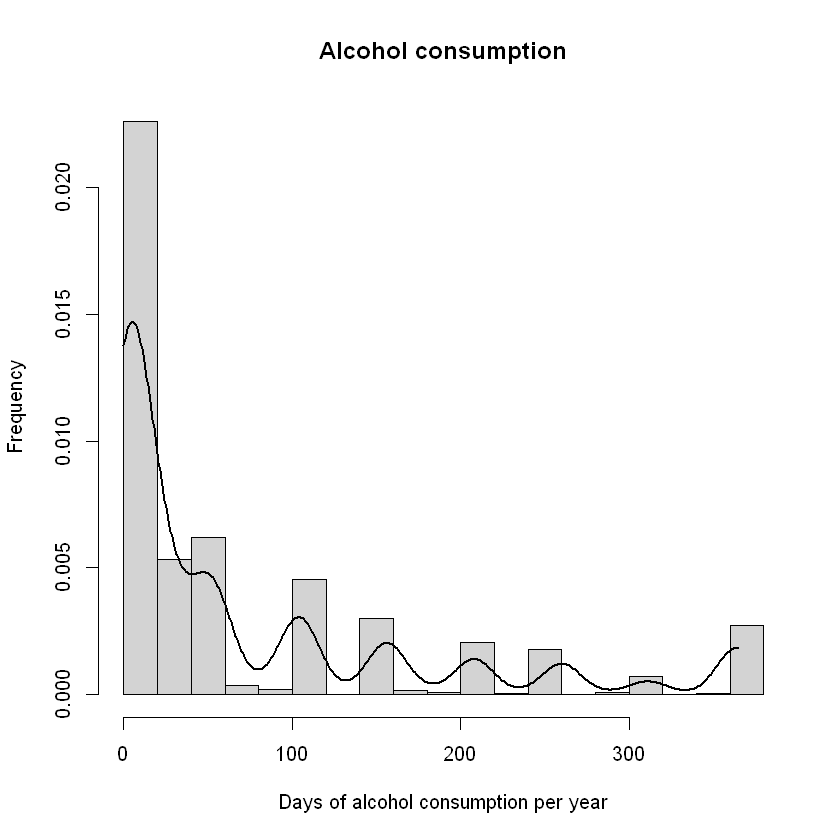

In [5]:
hist(NHANES$AlcoholYear,freq=F,
     main="Alcohol consumption",
     xlab="Days of alcohol consumption per year",ylab="Frequency")
lines(density(NHANES$AlcoholYear,na.rm=T,from=0,to=365),lwd=2)


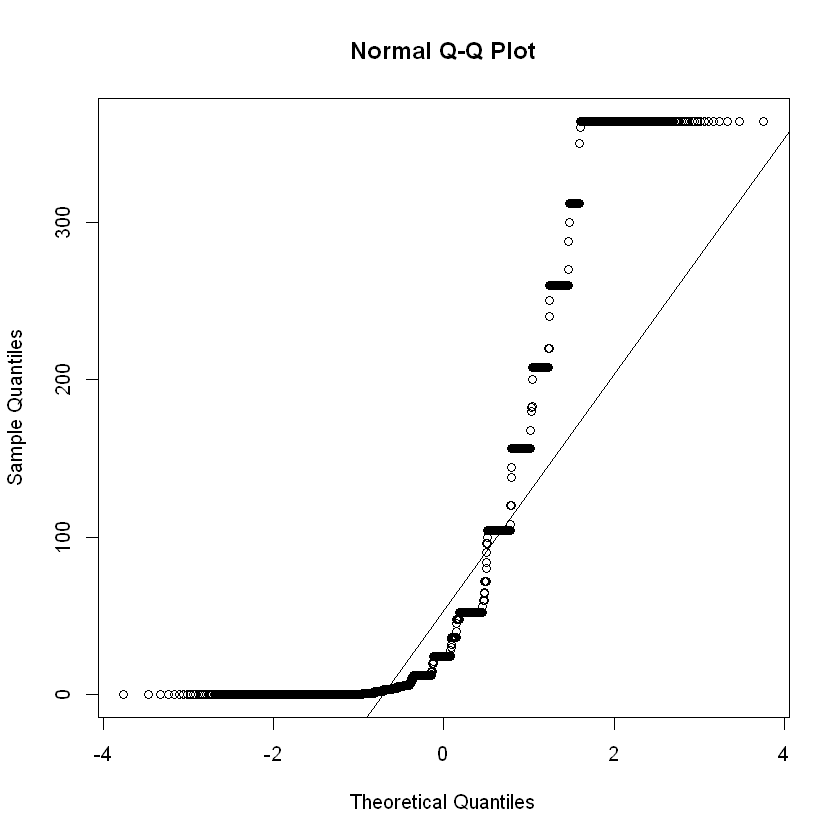

In [6]:
qqnorm(NHANES$AlcoholYear);qqline(NHANES$AlcoholYear)

What is normal Q-Q plots with 80 normal distributed data points?

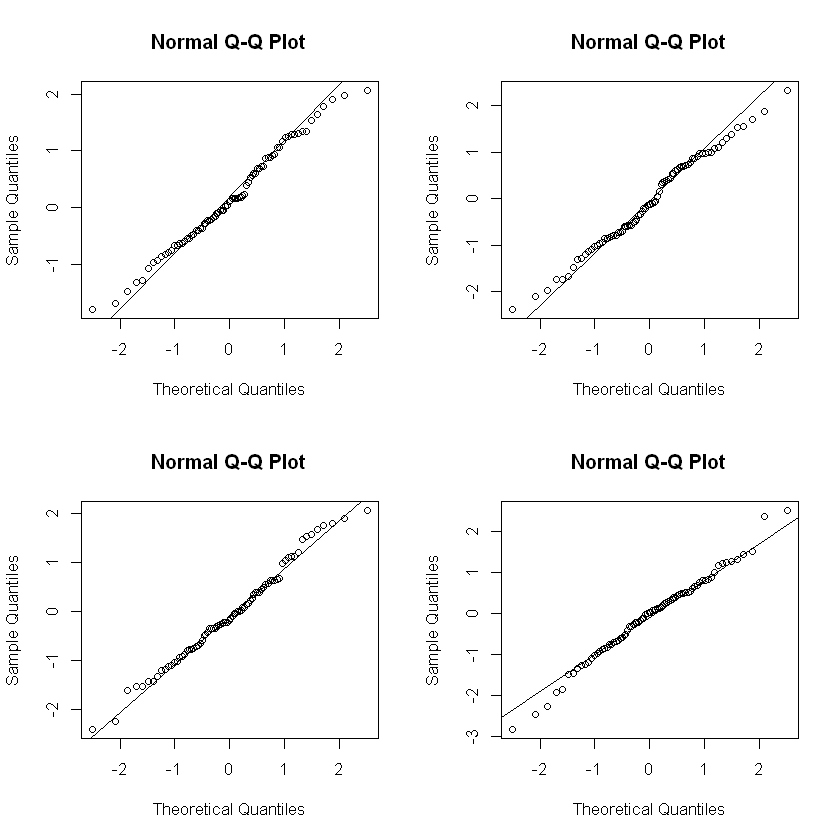

In [7]:
set.seed(4)  # For reproducibility
par(mfrow = c(2, 2))
for (i in 1:4) {
  random_data <- rnorm(80, mean = 0, sd = 1)
  qqnorm(random_data)
  qqline(random_data)
}
par(mfrow = c(1, 1))

## Descriptive statistics:

In [8]:
mean(NHANES_f80$AlcoholYear)

[1] 61.0125

In [9]:
median(NHANES_f80$AlcoholYear)

[1] 12

#### Differences between females and males:

In [10]:
mean(NHANES_f80$AlcoholYear[NHANES_f80$Gender=="female"])

[1] 31.32432

In [11]:
mean(NHANES_f80$AlcoholYear[NHANES_f80$Gender=="male"])

[1] 86.55814

In [12]:
mean(NHANES_f80$AlcoholYear[NHANES_f80$Gender=="female"])-mean(NHANES_f80$AlcoholYear[NHANES_f80$Gender=="male"])

[1] -55.23382

## Bootstrap confidence intervals:

95% bootstrap confidence intervals based on 10 000 bootstrap replicates.<br/>
Use bias-corrected and accelerated (BCa) if no warning, else percentile.

In [13]:
library(boot)

Bootstrap confidence interval for mean:

In [14]:
meanboot <- function(data, indices) {
  bootdata <- data[indices,]
  return (mean(bootdata$AlcoholYear))
}
set.seed(4)
resBoot <- boot(data=NHANES_f80, statistic=meanboot,R=10000)
boot.ci(resBoot)

Warning message in boot.ci(resBoot):
"bootstrap variances needed for studentized intervals"


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = resBoot)

Intervals : 
Level      Normal              Basic         
95%   (39.43, 82.78 )   (38.76, 81.61 )  

Level     Percentile            BCa          
95%   (40.41, 83.26 )   (42.66, 86.85 )  
Calculations and Intervals on Original Scale

Bootstrap confidence interval for median:

In [15]:
medianboot <- function(data, indices) {
  bootdata <- data[indices,]
  return (median(bootdata$AlcoholYear))
}
set.seed(4)
resBoot <- boot(data=NHANES_f80, statistic=medianboot,R=10000)
boot.ci(resBoot)

Warning message in boot.ci(resBoot):
"bootstrap variances needed for studentized intervals"
Warning message in norm.inter(t, adj.alpha):
"extreme order statistics used as endpoints"


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = resBoot)

Intervals : 
Level      Normal              Basic         
95%   (-2.14, 20.97 )   ( 0.00, 18.00 )  

Level     Percentile            BCa          
95%   ( 6, 24 )   ( 1, 12 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable

Bootstrap confidence interval for difference of means:

In [16]:
meanboot_bySex <- function(data, indices) {
  bootdata <- data[indices,]
  meanF <- mean(bootdata[bootdata$Gender=="female",]$AlcoholYear)
  meanM <- mean(bootdata[bootdata$Gender=="male",]$AlcoholYear)
  return ( meanF-meanM )
}
set.seed(4)
resBoot <- boot(data=NHANES_f80, statistic=meanboot_bySex,R=10000)
boot.ci(resBoot)

Warning message in boot.ci(resBoot):
"bootstrap variances needed for studentized intervals"


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = resBoot)

Intervals : 
Level      Normal              Basic         
95%   (-95.14, -15.28 )   (-95.37, -14.54 )  

Level     Percentile            BCa          
95%   (-95.92, -15.10 )   (-96.62, -15.66 )  
Calculations and Intervals on Original Scale

## Classical normal based statistics for comparison:


In [17]:
t.test(NHANES_f80$AlcoholYear)


	One Sample t-test

data:  NHANES_f80$AlcoholYear
t = 5.526, df = 79, p-value = 4.072e-07
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 39.03609 82.98891
sample estimates:
mean of x 
  61.0125 


In [18]:
AlcoholYear_female_f80 <- NHANES_f80$AlcoholYear[NHANES_f80$Gender=="female"]
AlcoholYear_male_f80   <- NHANES_f80$AlcoholYear[NHANES_f80$Gender=="male"]
t.test(AlcoholYear_female_f80 ,AlcoholYear_male_f80 )


	Welch Two Sample t-test

data:  AlcoholYear_female_f80 and AlcoholYear_male_f80
t = -2.6813, df = 69.007, p-value = 0.009168
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -96.32941 -14.13822
sample estimates:
mean of x mean of y 
 31.32432  86.55814 
